# Wine Quality Prediction 

In [1]:
# Import the libraries
import psycopg2
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Created a connection string to connect to the AWS database
conn = psycopg2.connect(host="dbfinalproject.c5qdbdj5dsfl.us-east-2.rds.amazonaws.com", port = 5432, database="dbRedwine", user="postgres", password="Raindrops12")

In [3]:
# Query run of all the data from the redwine table in pgadmin

df_wine = pd.read_sql("""
SELECT * FROM redwine  
""",con= conn)

df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [4]:
# Query run of all the data from the quality_description table in pgadmin

df_qualitydes = pd.read_sql("""
SELECT * FROM quality_description
""",con= conn)

df_qualitydes.head()

,quality,description
0,0,Not Good
1,1,Not Good
2,2,Not Good
3,3,Not Good
4,4,Average


## Joining Tables

In [5]:
## Joined the two tables
df_joined = pd.read_sql("""
SELECT a.*,b.description FROM redwine a inner join quality_description b on a.quality = b.quality 
""",con= conn)

df_joined.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,description
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5,Average
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5,Average
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5,Average
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.0,3.16,0.58,9.8,6,Average
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5,Average


## Exploratory Data Analysis(EDA)

In [6]:
## Get information about the dataset (information about a DataFrame including the index dtype and column dtypes,
## non-null values, and memory usage.)
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  description           1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [7]:
# To check missing values in each column. 
df_joined.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
description             0
dtype: int64

**There are no null values**

In [8]:
## Viewing the number of dimensions as well as the size in each dimension.
## the number of rows and columns.
df_joined.shape

(1599, 13)

**There are 1599 rows and 13 columns**

In [9]:
# Checking the value of numbers under each quality
df_joined['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Maximum number of values are for 5 and 6**

In [10]:
## To view the statistical summary of the dataframe
df_joined.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.528418,0.270976,2.538806,0.087867,15.874922,46.467792,0.998505,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179662,0.194801,1.409928,0.047116,10.460157,32.895324,0.003567,0.154386,0.169507,1.065677,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.010000,1.000000,6.000000,0.990000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,1.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,1.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,1.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.610000,72.000000,289.000000,1.000000,4.010000,2.000000,14.900000,8.000000


**Observations**:
- The average wine quality is 6. The mininum is 3 and maximum is 8
- The maximum alchol level is 14.9 and minimum is 8.4
- Maximum sulphate is 2 and minimum is 0.33
- Maximum citric acid is 1 and minimum is 0.

In [11]:
#observing the correlation between features and target variable. 
wine_corr = df_joined.corr( )
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255729,0.671703,0.114777,0.093516,-0.153794,-0.113181,0.342622,-0.682978,0.183006,-0.061679,0.124052
volatile_acidity,-0.255729,1.000000,-0.552262,0.002221,0.062764,-0.011001,0.076128,0.071211,0.234503,-0.260782,-0.202301,-0.390509
citric_acid,0.671703,-0.552262,1.000000,0.143577,0.200386,-0.060978,0.035533,0.132430,-0.541904,0.312770,0.109895,0.226373
residual_sugar,0.114777,0.002221,0.143577,1.000000,0.052162,0.187049,0.203028,0.130322,-0.085652,0.005527,0.042079,0.013732
chlorides,0.093516,0.062764,0.200386,0.052162,1.000000,0.002842,0.045041,0.170939,-0.263258,0.368425,-0.220174,-0.131756
free_sulfur_dioxide,-0.153794,-0.011001,-0.060978,0.187049,0.002842,1.000000,0.667666,-0.008453,0.070377,0.051658,-0.069401,-0.050656
total_sulfur_dioxide,-0.113181,0.076128,0.035533,0.203028,0.045041,0.667666,1.000000,0.074662,-0.066495,0.042947,-0.205643,-0.185100
density,0.342622,0.071211,0.132430,0.130322,0.170939,-0.008453,0.074662,1.000000,-0.231771,0.078332,-0.520315,-0.210726
ph,-0.682978,0.234503,-0.541904,-0.085652,-0.263258,0.070377,-0.066495,-0.231771,1.000000,-0.196648,0.205635,-0.057731
sulphates,0.183006,-0.260782,0.312770,0.005527,0.368425,0.051658,0.042947,0.078332,-0.196648,1.000000,0.093595,0.251397


- There is not such a great correlation beween the features and quality. It could be bacause quality is a subject measures, whereas the variables are not

In [12]:
## Correlation between quality and other features.
wine_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476164
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
ph                     -0.057731
chlorides              -0.131756
total_sulfur_dioxide   -0.185100
density                -0.210726
volatile_acidity       -0.390509
Name: quality, dtype: float64

<AxesSubplot:>

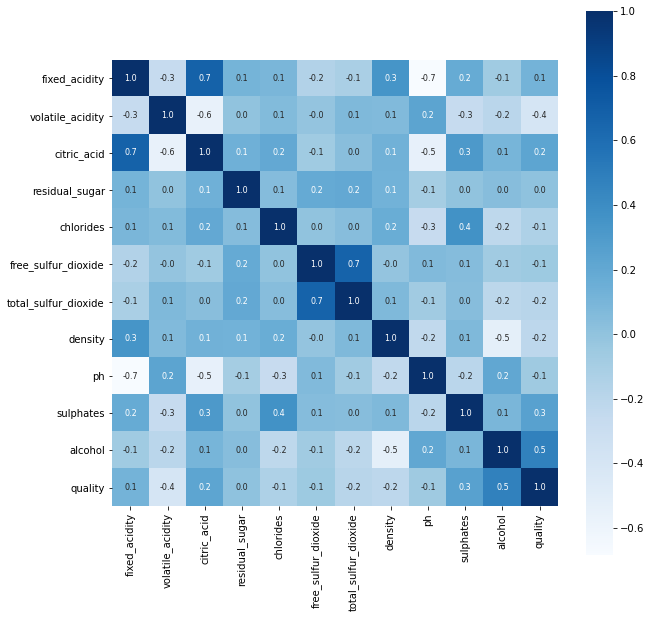

In [13]:
# Ploting the heatmap to understand the correlation between the columns
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(wine_corr, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

**Observations:**
- Darker the color, higher is the correlation of the column with the quality
- The dark color represents the positive correlation, i.e., they are directly proportinal 
- The light color represents the negative correlation, i.e., they are inversely proportinal
- Alchol has the highest correlation to quality
- Sulphates and volatile aciditty are highly correlated after alcohol


<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

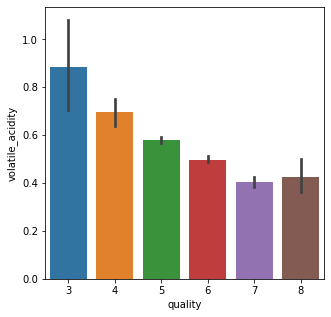

In [14]:
# Volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile_acidity', data = df_joined)

**Observation:**

- Volatile acidity and quality of the wine are inverserly proportional. When the volatile acidity is high, wine quality is low   and vice versa

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

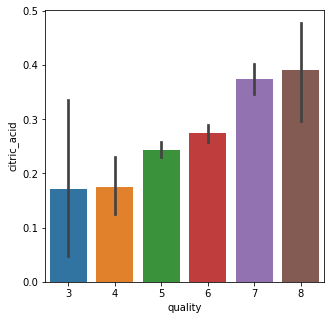

In [15]:
# Citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric_acid', data = df_joined)

**Observation:**
- If the content of citric acid is more, wine quality is better. So, citric acid is directly proportinal to quality

# Data Preprocessing

In [16]:
# Separate the data and label
X = df_joined.drop(['quality','description'],axis=1)
print(X)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9       0.08   
1               7.8              0.88         0.00             2.6       0.10   
2               7.8              0.76         0.04             2.3       0.09   
3              11.2              0.28         0.56             1.9       0.08   
4               7.4              0.70         0.00             1.9       0.08   
...             ...               ...          ...             ...        ...   
1594            6.2              0.60         0.08             2.0       0.09   
1595            5.9              0.55         0.10             2.2       0.06   
1596            6.3              0.51         0.13             2.3       0.08   
1597            5.9              0.65         0.12             2.0       0.08   
1598            6.0              0.31         0.47             3.6       0.07   

      free_sulfur_dioxide  

### Label Encoding

In [17]:
y = df_joined['description'].apply(lambda value:1 if value=='Good' else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: description, Length: 1599, dtype: int64


**1 is "good" quality wine and 0 is "not good" quality wine**

### Training and Spliting Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state = 78)


In [19]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [20]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Train the ML Model with Random Forest Classifier

In [21]:
## Assigning the RandomForestClassifier to a variable
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [22]:
## Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


### Evaluate the model using accuracy score value

In [23]:
## Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [24]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.925

**Observation:**
- The accuracy score is 93, which means that out of 100 predictions, our model can correctly predict for 93 values

In [25]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)
cm

array([[269,   1],
       [ 23,  27]], dtype=int64)

In [27]:
# Creating a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,269,1
Actual 1,23,27


**Observations:**
- True positives: 278
- False positives: 16
- False negatives: 5
- True negatives: 21

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,269,1
Actual 1,23,27


Accuracy Score : 0.925
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       270
           1       0.96      0.54      0.69        50

    accuracy                           0.93       320
   macro avg       0.94      0.77      0.82       320
weighted avg       0.93      0.93      0.92       320



In [29]:
# Calculating the feature importance
importances = rf_model.feature_importances_
importances

array([0.08187926, 0.12127719, 0.09321721, 0.07999088, 0.05213921,
       0.07117224, 0.09676524, 0.01714761, 0.07489897, 0.13066506,
       0.18084713])

In [30]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.180847131495865, 'alcohol'),
 (0.13066505621413746, 'sulphates'),
 (0.1212771880348002, 'volatile_acidity'),
 (0.09676523612613973, 'total_sulfur_dioxide'),
 (0.09321720874901661, 'citric_acid'),
 (0.0818792616241614, 'fixed_acidity'),
 (0.07999088187958542, 'residual_sugar'),
 (0.07489897147252006, 'ph'),
 (0.07117224384129824, 'free_sulfur_dioxide'),
 (0.052139211075026504, 'chlorides'),
 (0.017147609487449457, 'density')]

**Observation:**
- Alcohol, sulphase and volatile acidity are the more important features for the model